In [3]:
import numpy
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.transforms import ToTensor
from torch import nn
from torch.utils.data import DataLoader

In [25]:
# datasets: 'digits', 'fashion'
dataset = 'digits'

In [26]:
if dataset == 'digits':
    data = torchvision.datasets.MNIST(
        root='data',
        train=True,
        download=True,
        transform=ToTensor()
    )

    test_data = torchvision.datasets.MNIST(
        root='data',
        train=False,
        download=True,
        transform=ToTensor()
    )
    labels_map = {
        0: "0",
        1: "1",
        2: "2",
        3: "3",
        4: "4",
        5: "5",
        6: "6",
        7: "7",
        8: "8",
        9: "9",
    }
elif dataset == 'fashion':
    data = torchvision.datasets.FashionMNIST(
        root='data',
        train=True,
        download=True,
        transform=ToTensor()
    )

    test_data = torchvision.datasets.FashionMNIST(
        root='data',
        train=False,
        download=True,
        transform=ToTensor()
    )
    labels_map = {
        0: "T-Shirt",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle Boot",
    }

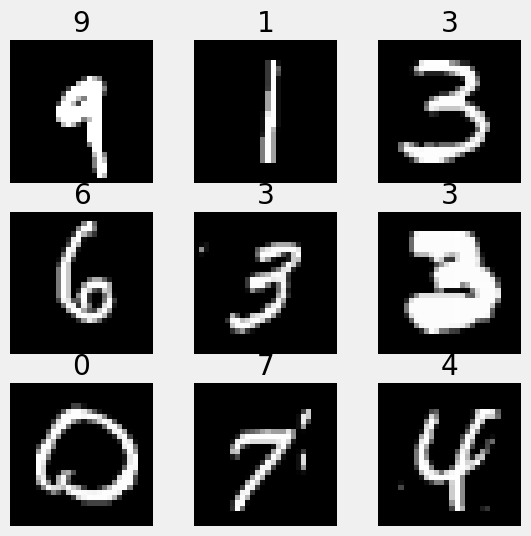

In [27]:
figure = plt.figure(figsize=(6,6))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_index = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_index]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.title(labels_map[label])
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [28]:
data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [29]:
class VarAutoencoder(nn.Module):

    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 40),
            nn.ReLU(),
            nn.Linear(40, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
        self.linear1 = nn.Linear(20, 10)
        self.linear2 = nn.Linear(20, 10)
        self.G = torch.distributions.Normal(0, 1)

    def reparametrize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        return mu + std*self.G.sample(mu.shape)

    def forward(self, x):
        x = self.encoder(x)
        mu = self.linear1(x)
        logvar = self.linear2(x)
        z = self.reparametrize(mu, logvar)
        output = self.decoder(z)
        return output, mu, logvar

In [30]:
learning_rate = 1e-4
batch_size = 32

VAE = VarAutoencoder()

In [31]:
loss_1 = nn.MSELoss()

In [32]:
def loss_2(mu, logvar):
    return torch.mean(-0.5 * torch.sum(1 + logvar - mu ** 2 - torch.exp(logvar), dim = 1), dim = 0).sum()

In [33]:
#optimizer = torch.optim.SGD(ae.parameters(), lr=learning_rate, momentum=momentum)
optimizer = torch.optim.Adam(VAE.parameters(),
                             lr = learning_rate,
                             weight_decay = 1e-8)
data_loader = DataLoader(data, batch_size=batch_size, shuffle=True)

Epoch  0
loss1 tensor(0.2311) loss2 tensor(0.0966)
[ 5 23  5 11]


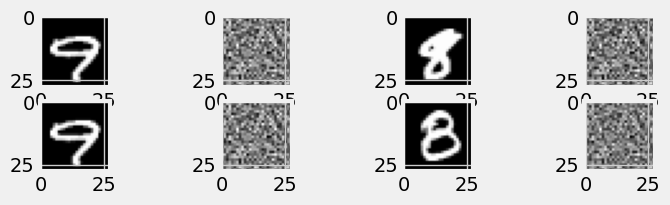

2.3106942176818848
Epoch  1
loss1 tensor(0.0663) loss2 tensor(4.8472)
[25 16 29 11]


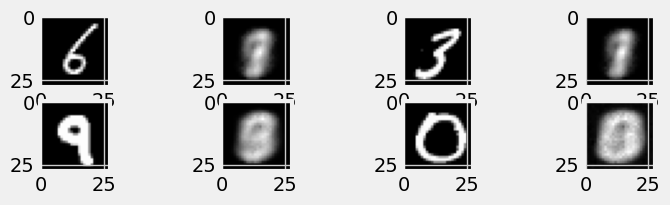

0.6677049994468689
Epoch  2
loss1 tensor(0.0607) loss2 tensor(8.1769)
[13 20 27  7]


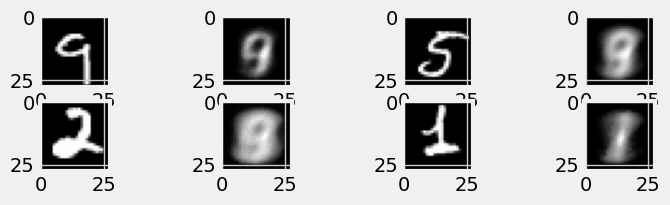

0.6148602962493896
Epoch  3
loss1 tensor(0.0533) loss2 tensor(11.4425)
[ 4 16 31 30]


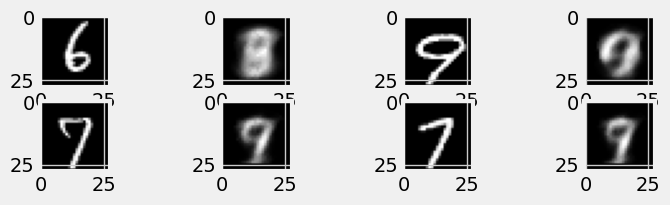

0.5448958873748779
Epoch  4
loss1 tensor(0.0421) loss2 tensor(17.1059)
[22 30  3 30]


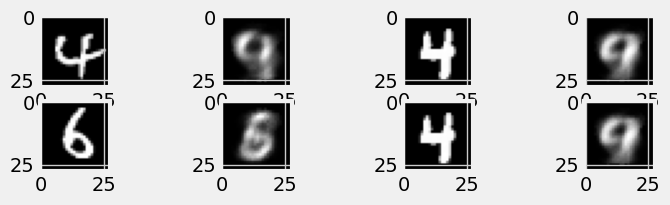

0.43805113434791565
Epoch  5
loss1 tensor(0.0430) loss2 tensor(17.2558)
[29 23  6  9]


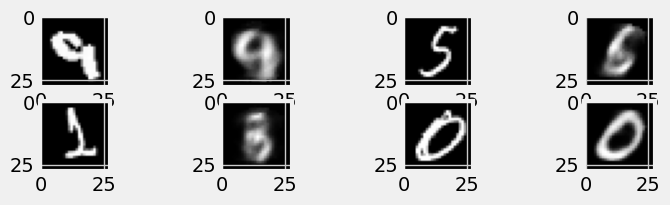

0.44765397906303406
Epoch  6
loss1 tensor(0.0425) loss2 tensor(16.6618)
[ 8 26 22 28]


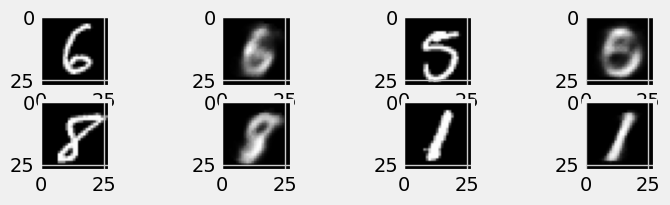

0.4416176974773407
Epoch  7
loss1 tensor(0.0393) loss2 tensor(16.9699)
[ 8  6  2 18]


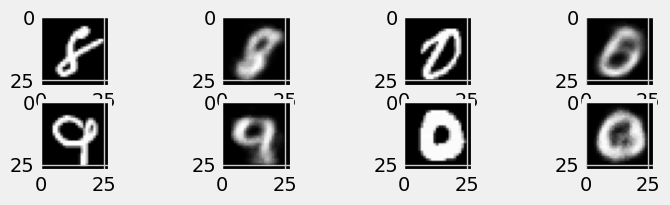

0.4098387658596039
Epoch  8
loss1 tensor(0.0385) loss2 tensor(18.1804)
[14 24  1  2]


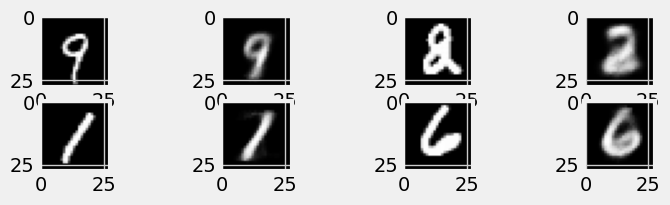

0.40313518047332764
Epoch  9
loss1 tensor(0.0408) loss2 tensor(17.0178)
[22 23  2  9]


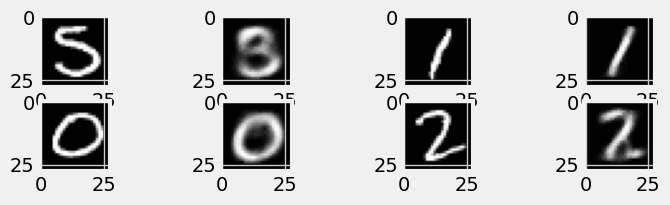

0.4248366057872772
Epoch  10
loss1 tensor(0.0346) loss2 tensor(18.3887)
[24 26  6 16]


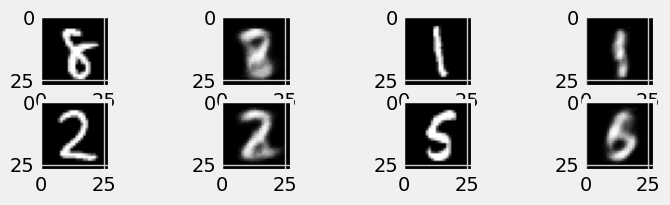

0.3639427423477173
Epoch  11
loss1 tensor(0.0375) loss2 tensor(22.1384)
[10 24 31 24]


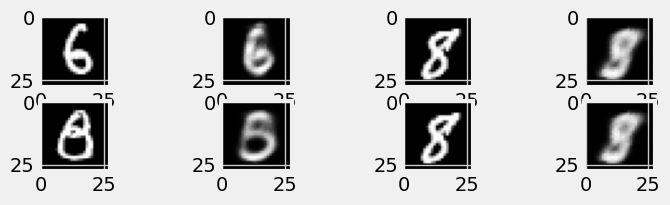

0.39673614501953125
Epoch  12
loss1 tensor(0.0369) loss2 tensor(20.5214)
[13 15 26 13]


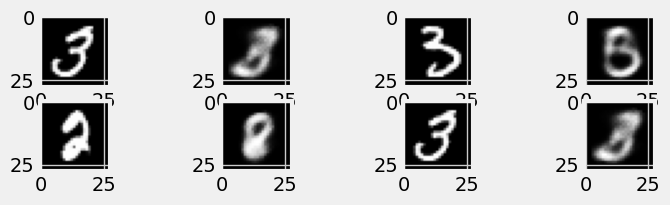

0.3897188603878021
Epoch  13
loss1 tensor(0.0353) loss2 tensor(18.8339)
[31  6  1  1]


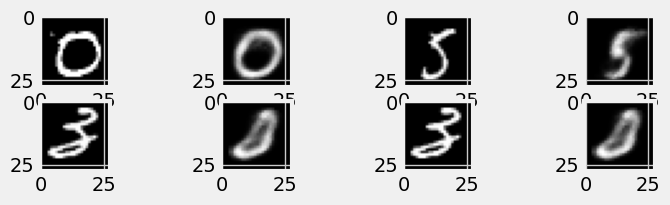

0.37136220932006836
Epoch  14
loss1 tensor(0.0339) loss2 tensor(18.3174)
[ 9  7 25 15]


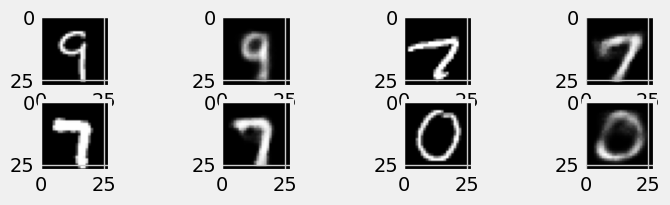

0.357098251581192
Epoch  15
loss1 tensor(0.0299) loss2 tensor(20.8025)
[28 15 14 19]


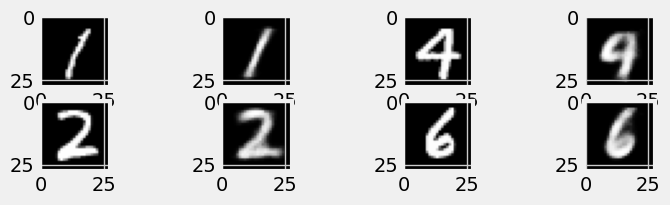

0.31952324509620667
Epoch  16
loss1 tensor(0.0361) loss2 tensor(18.0907)
[15 30 15 16]


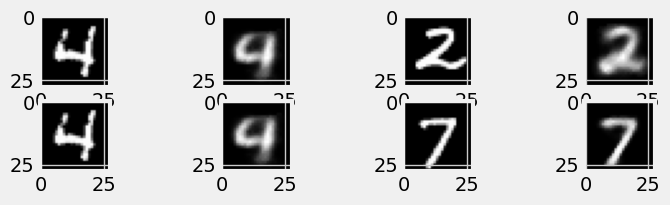

0.37894612550735474
Epoch  17
loss1 tensor(0.0311) loss2 tensor(18.4897)
[19 12  7 24]


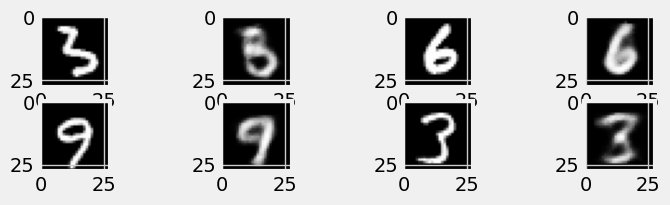

0.32939615845680237
Epoch  18
loss1 tensor(0.0318) loss2 tensor(18.1581)
[ 9 18  5 13]


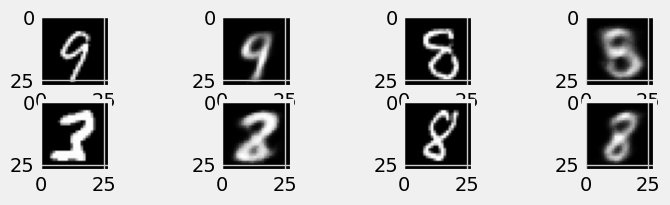

0.3360716700553894
Epoch  19
loss1 tensor(0.0318) loss2 tensor(17.9849)
[15  4 10 25]


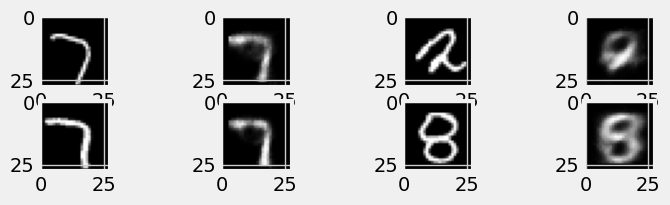

0.3363109230995178
Epoch  20
loss1 tensor(0.0307) loss2 tensor(18.2748)
[15 12 10 14]


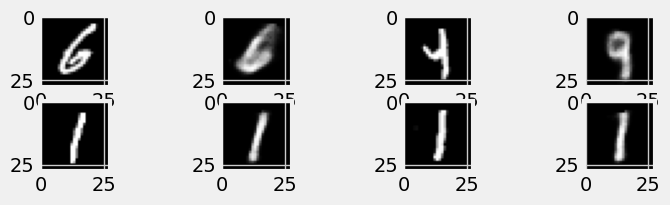

0.3255097270011902
Epoch  21
loss1 tensor(0.0291) loss2 tensor(18.7923)
[ 9 15 15 16]


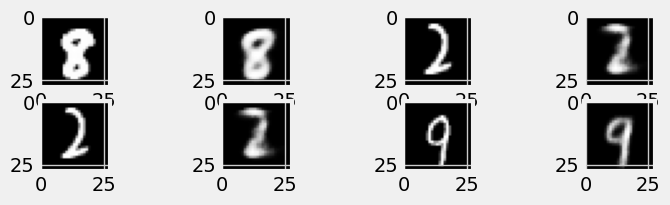

0.3102708160877228
Epoch  22
loss1 tensor(0.0284) loss2 tensor(19.0923)
[31  7  6 12]


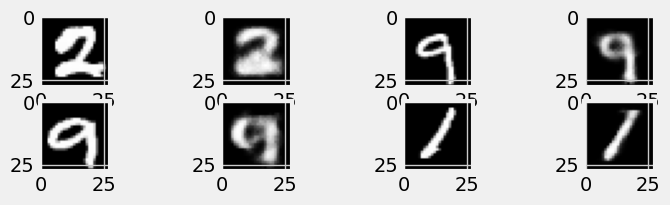

0.30302438139915466
Epoch  23
loss1 tensor(0.0311) loss2 tensor(18.1879)
[ 9 16 21  8]


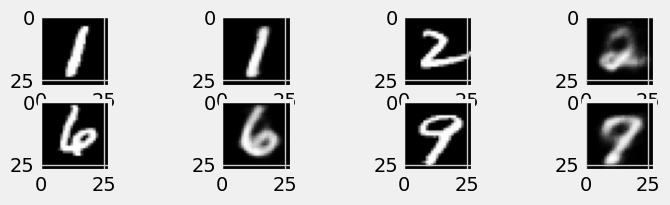

0.3291780650615692
Epoch  24
loss1 tensor(0.0285) loss2 tensor(19.5261)
[19 19 14  5]


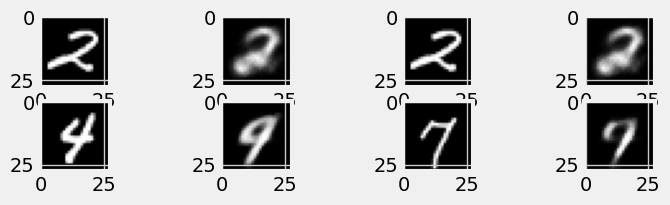

0.30469805002212524
Epoch  25
loss1 tensor(0.0294) loss2 tensor(18.3451)
[ 7  1 21 10]


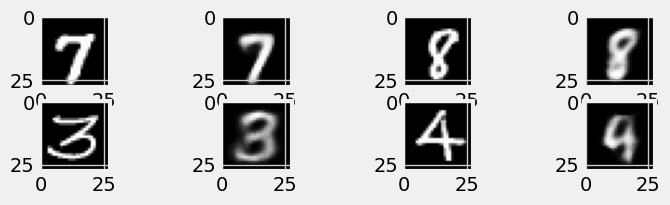

0.31234440207481384
Epoch  26
loss1 tensor(0.0319) loss2 tensor(18.4140)
[ 8  3 21  0]


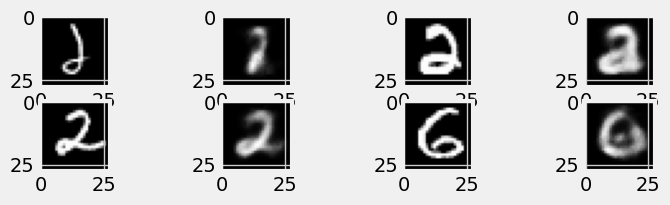

0.33752065896987915
Epoch  27
loss1 tensor(0.0291) loss2 tensor(18.4381)
[ 9 16 20 19]


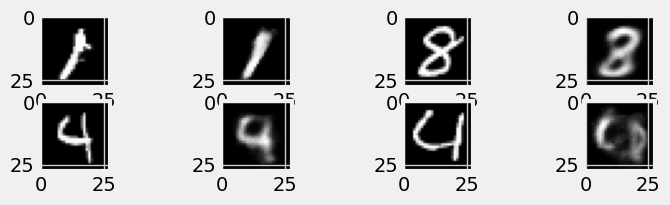

0.3098159730434418
Epoch  28
loss1 tensor(0.0307) loss2 tensor(19.1931)
[ 8 14  7 16]


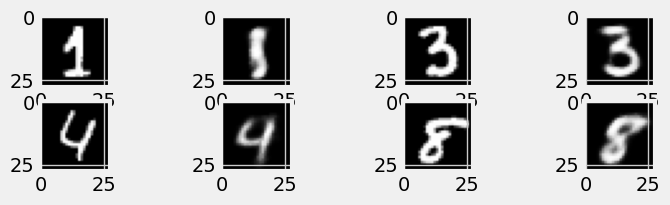

0.3262033760547638
Epoch  29
loss1 tensor(0.0316) loss2 tensor(18.3723)
[19 18 11 18]


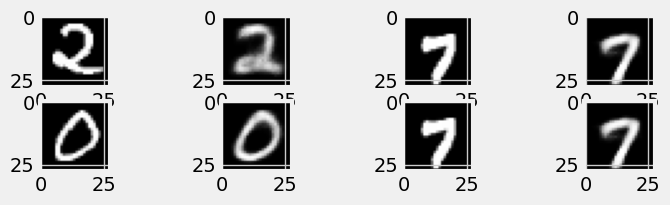

0.3341784179210663


In [34]:
# Training loop
epochs = 30
losses = []
beta1 = 10
beta2 = 0.001
for epoch in range(epochs):
    plot = True

    VAE.train()
    for (image, _) in data_loader:

        # Reshape image for input
        image = image.reshape(-1, 784)

        # Feed through the network
        reconstruction, mu, logvar = VAE(image)
        # Calculate loss function
        loss = beta1*loss_1(reconstruction, image) + beta2*loss_2(mu, logvar)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if plot==True:
            fig = plt.figure(figsize=(8,4))
            print('Epoch ', epoch)
            with torch.no_grad():
                print('loss1', loss_1(reconstruction, image), 'loss2', loss_2(mu, logvar))
                recon_plot = reconstruction.reshape(-1, 28, 28)
                images_plot = image.reshape(-1, 28, 28)
                indices = numpy.random.choice(32, 4)
                print(indices)
                for i, ind in enumerate(indices):
                    ax1 = fig.add_subplot(4,4,2*i+1)
                    ax1.imshow(images_plot[ind], cmap='gray')
                    ax2 = fig.add_subplot(4,4,2*i+2)
                    ax2.imshow(recon_plot[ind], cmap='gray')
            
            plt.show()
            print(losses[-1])
            plot=False

        

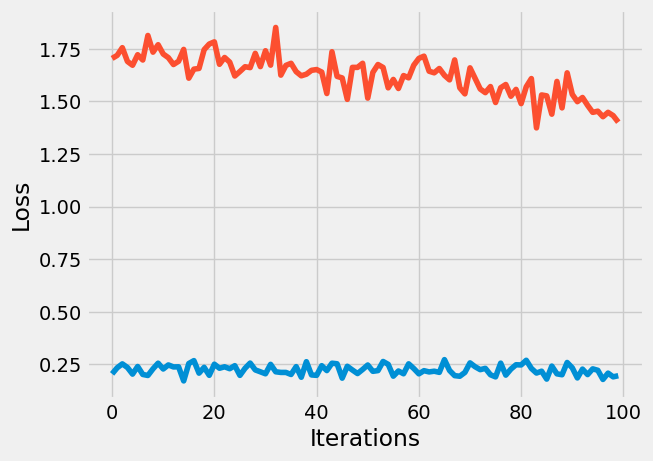

In [20]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses[-100:])
plt.plot(losses[:100])

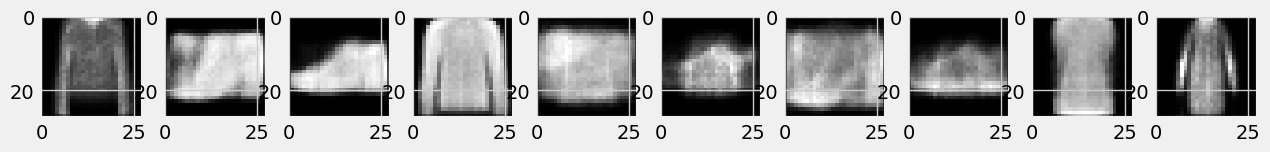

In [24]:
# Decoding randomly generated latent space points

sample_index = numpy.random.randint(len(data))
img, label = data[sample_index]
fig = plt.figure(figsize=(14,10))
with torch.no_grad():
    for i in range(10):
        z = VAE.encoder(img.reshape(-1, 784))
        z = VAE.linear1(z)
        #print(z)
        z_rand = torch.distributions.Normal(0,1).sample(z.shape)
        x_rand = VAE.decoder(z_rand)
        ax = fig.add_subplot(1,10,i+1)
        ax.imshow(x_rand.squeeze().reshape(28,28), cmap='grey')
plt.show()